In [19]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_excel(r"../dano_base.xlsx")
df

,Unnamed: 0,application_id,primary_income_dt,party_rk,product_code,account_own_flg,sch_flg,success_flg,validation_flg,reject_flg,...,inkas_flg,cash_out_flg,vzr_flg,concierge_flg,cb_flg,invest_flg,mobile_flg,out_c2c_flg,car_ins_flg,percent_flg
0,0,3379c95477164e679ef80291a36a50ec,2023-03-05,772887927.0,DCV,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,2e23732fef4749e1ae7a89ec978b7bf7,2023-03-05,858351423.0,DCV,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,df795c04bd834c0d8a2960d3b0593938,2023-03-09,864683115.0,DCV,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,7c2512d6bf2d47fe91eefc75f8062698,2023-03-13,294312227.0,DCV,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,ca547a88dd0c42f2a50657af01b87317,2023-03-03,815163498.0,DCV,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73707,73707,8168937fbe4c447ca420614d4e032d94,2023-03-14,380072334.0,DCV,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
73708,73708,18de6aaefd9c478a9a2f7a04750e3d56,2023-03-21,941415613.0,DCV,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
73709,73709,f03232cd563044f299b400a49ad95534,2023-03-03,863738223.0,DCV,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
73710,73710,269435523adf4ec79361fa9fec903967,2023-03-09,956387021.0,DCV,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73712 entries, 0 to 73711
Data columns (total 66 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Unnamed: 0                 73712 non-null  int64         
 1   application_id             73711 non-null  object        
 2   primary_income_dt          73712 non-null  datetime64[ns]
 3   party_rk                   73709 non-null  float64       
 4   product_code               73712 non-null  object        
 5   account_own_flg            73712 non-null  int64         
 6   sch_flg                    73712 non-null  int64         
 7   success_flg                73712 non-null  int64         
 8   validation_flg             73712 non-null  int64         
 9   reject_flg                 73712 non-null  int64         
 10  account_flg                73712 non-null  int64         
 11  utilization_flg            73712 non-null  int64         
 12  ccr_

In [5]:
df.describe()

,Unnamed: 0,primary_income_dt,party_rk,account_own_flg,sch_flg,success_flg,validation_flg,reject_flg,account_flg,utilization_flg,...,inkas_flg,cash_out_flg,vzr_flg,concierge_flg,cb_flg,invest_flg,mobile_flg,out_c2c_flg,car_ins_flg,percent_flg
count,73712.000000,73712,7.370900e+04,73712.000000,73712.000000,73712.000000,73712.000000,73712.000000,73712.000000,73712.000000,...,73712.000000,73712.000000,73712.000000,73712.000000,73712.000000,73712.000000,73712.0,73712.000000,73712.000000,73712.000000
mean,36855.500000,2023-03-16 04:06:17.034946816,7.179178e+08,0.855166,0.414885,0.261816,0.099902,0.603687,0.653476,0.288013,...,0.000041,0.007624,0.005996,0.001818,0.008370,0.078603,0.0,0.022574,0.003880,0.009808
min,0.000000,2023-03-01 00:00:00,1.320000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,18427.750000,2023-03-08 00:00:00,5.565410e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,36855.500000,2023-03-16 00:00:00,7.852314e+08,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,55283.250000,2023-03-24 00:00:00,9.445555e+08,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,73711.000000,2023-03-31 00:00:00,1.062670e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000
std,21278.965858,NaN,2.569007e+08,0.351936,0.492706,0.439626,0.299872,0.489134,0.475866,0.452840,...,0.006379,0.086984,0.077204,0.042598,0.091107,0.269120,0.0,0.148543,0.062169,0.098551


In [6]:
df = df.dropna(subset="subscription_time")
df

,Unnamed: 0,application_id,primary_income_dt,party_rk,product_code,account_own_flg,sch_flg,success_flg,validation_flg,reject_flg,...,inkas_flg,cash_out_flg,vzr_flg,concierge_flg,cb_flg,invest_flg,mobile_flg,out_c2c_flg,car_ins_flg,percent_flg
1,1,2e23732fef4749e1ae7a89ec978b7bf7,2023-03-05,858351423.0,DCV,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,df795c04bd834c0d8a2960d3b0593938,2023-03-09,864683115.0,DCV,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,7c2512d6bf2d47fe91eefc75f8062698,2023-03-13,294312227.0,DCV,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,ca547a88dd0c42f2a50657af01b87317,2023-03-03,815163498.0,DCV,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,6,a1ed0e65df5242fcaf08713a4e90948e,2023-03-29,753966360.0,DCV,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73703,73703,461d7cf81bd5430899cec42a6fb18741,2023-03-30,698060918.0,DCV,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
73704,73704,9dd6813da8b64ce69d66933022e93ee0,2023-03-30,852830245.0,DCV,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
73705,73705,c3d9072737e24388a88227d08399a4bb,2023-03-04,803521909.0,DCV,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
73707,73707,8168937fbe4c447ca420614d4e032d94,2023-03-14,380072334.0,DCV,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df = df.loc[df["reject_flg"] == 0]
df

,Unnamed: 0,application_id,primary_income_dt,party_rk,product_code,account_own_flg,sch_flg,success_flg,validation_flg,reject_flg,...,inkas_flg,cash_out_flg,vzr_flg,concierge_flg,cb_flg,invest_flg,mobile_flg,out_c2c_flg,car_ins_flg,percent_flg
2,2,df795c04bd834c0d8a2960d3b0593938,2023-03-09,864683115.0,DCV,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,7c2512d6bf2d47fe91eefc75f8062698,2023-03-13,294312227.0,DCV,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,a1ed0e65df5242fcaf08713a4e90948e,2023-03-29,753966360.0,DCV,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,8,c72c66234bde4c5ca451dea5d623198c,2023-03-13,956250503.0,DCV,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
16,16,6e35627b117c405b99a211ca9d587f41,2023-03-13,321565424.0,DCV,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73698,73698,1734adb2d1104adca4d2cb37b88f5513,2023-03-24,856049457.0,DCV,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
73699,73699,b4ed59376d304c6d81b2085f74c7e9cc,2023-03-28,996743753.0,DCV,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73703,73703,461d7cf81bd5430899cec42a6fb18741,2023-03-30,698060918.0,DCV,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
73704,73704,9dd6813da8b64ce69d66933022e93ee0,2023-03-30,852830245.0,DCV,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

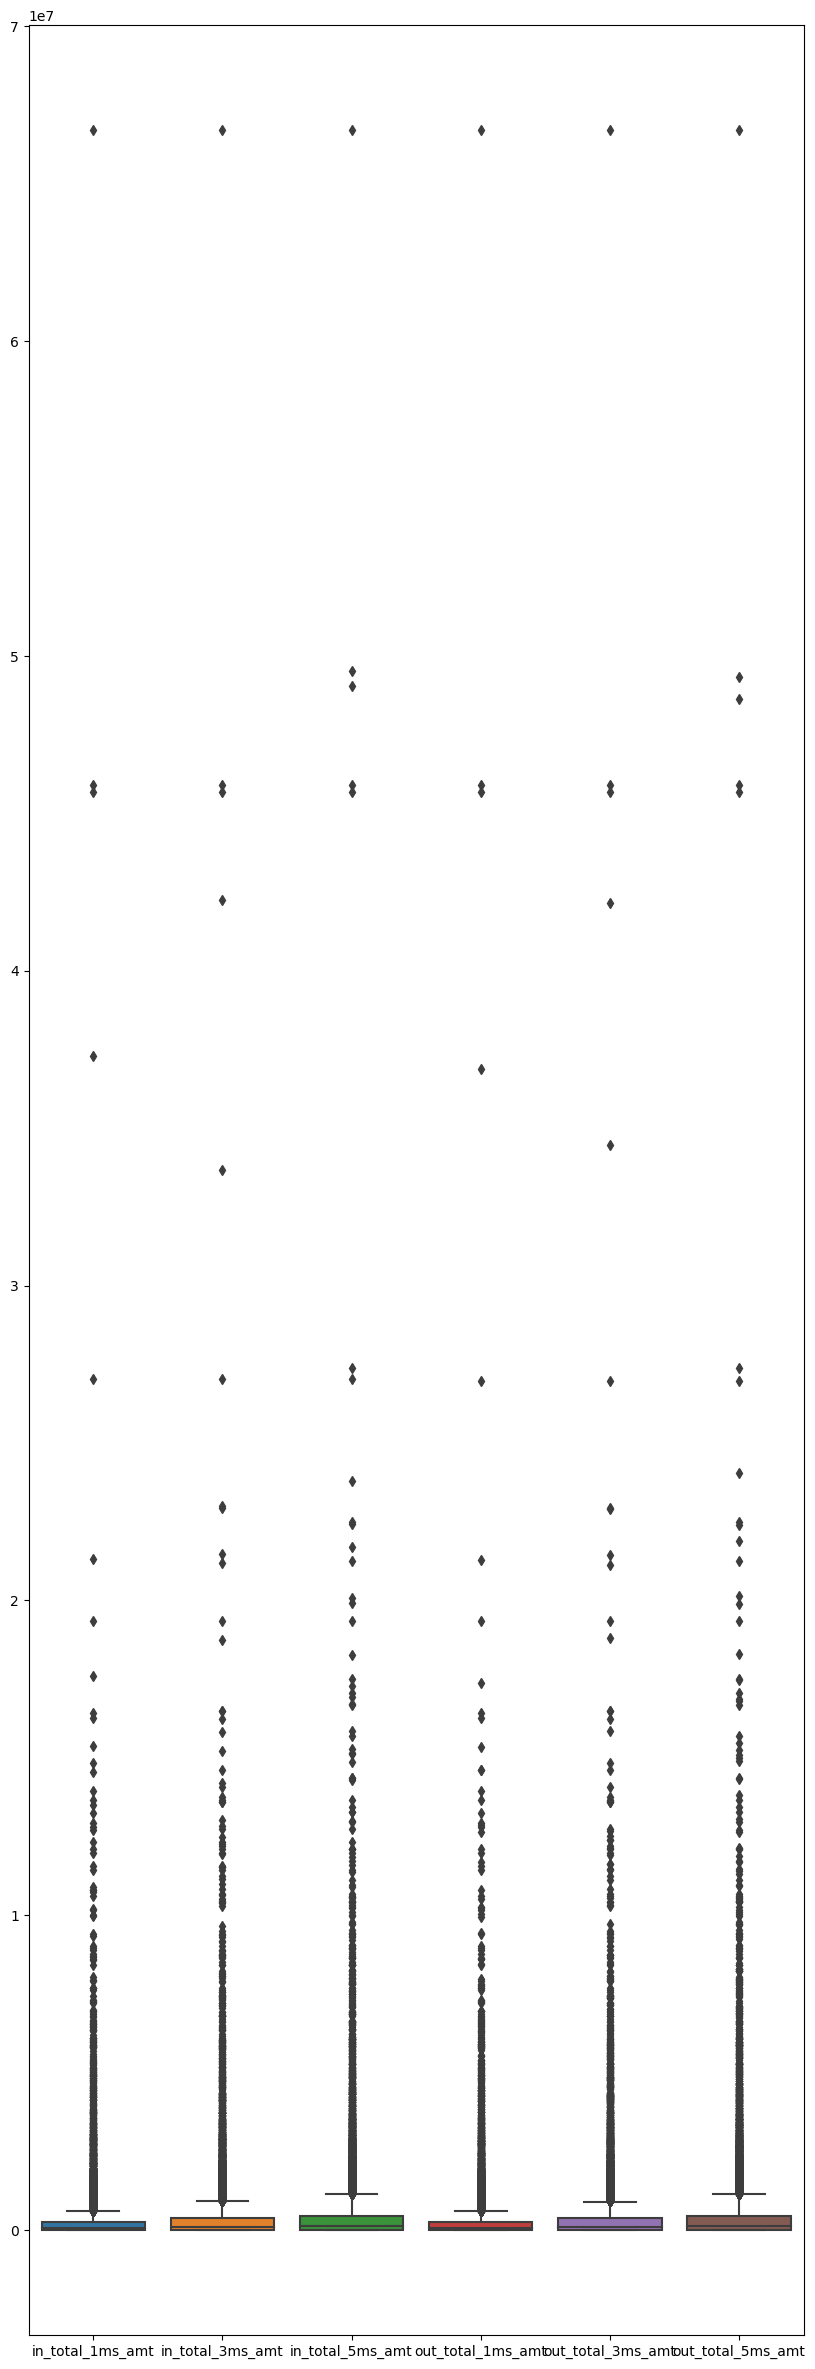

In [18]:
fig, ax = plt.subplots(figsize=(10, 30))
sns.boxplot(
    df[
        [
            "in_total_1ms_amt",
            "in_total_3ms_amt",
            "in_total_5ms_amt",
            "out_total_1ms_amt",
            "out_total_3ms_amt",
            "out_total_5ms_amt",
        ]
    ]
)

In [20]:
dfpl = pl.from_pandas(df)
dfpl

Unnamed: 0,application_id,primary_income_dt,party_rk,product_code,account_own_flg,sch_flg,success_flg,validation_flg,reject_flg,account_flg,utilization_flg,ccr_account_first_open_dt,dep_account_first_open_dt,cur_account_first_open_dt,sav_account_first_open_dt,cln_account_first_open_dt,pos_account_first_open_dt,subscription_time,channel_desc,region_size,trial_type,metall_flg,age_segment,res_segment,open_cc_flg,util_cc_flg,open_cn_flg,util_cn_flg,open_sav_flg,util_sav_flg,open_dep_flg,util_dep_flg,open_mb_flg,util_mb_flg,open_inv_flg,util_inv_flg,in_5ms_cnt,in_3ms_cnt,in_1ms_cnt,out_5ms_puc_cnt,out_3ms_puc_cnt,out_1ms_puc_cnt,out_5ms_uch_cnt,out_3ms_uch_cnt,out_1ms_uch_cnt,out_5ms_all_cnt,out_3ms_all_cnt,out_1ms_all_cnt,in_total_5ms_amt,in_total_3ms_amt,in_total_1ms_amt,out_total_5ms_amt,out_total_3ms_amt,out_total_1ms_amt,lk_flg,inkas_flg,cash_out_flg,vzr_flg,concierge_flg,cb_flg,invest_flg,mobile_flg,out_c2c_flg,car_ins_flg,percent_flg
i64,str,datetime[ns],f64,str,i64,i64,i64,i64,i64,i64,i64,datetime[ns],datetime[ns],datetime[ns],datetime[ns],datetime[ns],datetime[ns],f64,str,str,str,i64,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,i64,f64,f64,i64,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
2,"""df795c04bd834c…",2023-03-09 00:00:00,8.64683115e8,"""DCV""",0,1,0,0,0,1,0,null,null,2022-06-10 00:00:00,null,null,null,87710.540598,"""Web""","""неизвестно""","""1 mon""",0,"""36-40""","""Восток СНГ""",0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0
3,"""7c2512d6bf2d47…",2023-03-13 00:00:00,2.94312227e8,"""DCV""",0,1,1,0,0,1,1,2021-06-06 00:00:00,null,2019-03-19 00:00:00,null,null,2021-12-16 00:00:00,2.7724e6,"""Web""","""ГОРОД""",null,1,"""14-17""","""РФ""",0,0,0,0,0,0,0,0,0,0,0,0,9,9.0,9.0,0,0.0,0.0,0,0.0,0.0,1,1.0,1.0,35235.85,35235.85,35235.85,35235.85,35235.85,35235.85,0,0,0,0,0,0,0,0,0,0,0
6,"""a1ed0e65df5242…",2023-03-29 00:00:00,7.5396636e8,"""DCV""",1,1,1,0,0,1,0,null,null,2021-10-19 00:00:00,null,null,null,5.2883e6,"""Web""","""ГОРОД""","""1 mon""",1,"""18-22""","""РФ""",0,0,0,0,0,0,0,0,0,0,0,0,2,0.0,0.0,1,0.0,0.0,0,0.0,0.0,0,0.0,0.0,8361.9,0.0,0.0,8361.9,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0
8,"""c72c66234bde4c…",2023-03-13 00:00:00,9.56250503e8,"""DCV""",1,1,1,0,0,1,1,2023-02-03 00:00:00,null,2022-12-15 00:00:00,2022-12-20 00:00:00,null,null,5.2817e6,"""МБ""","""ПОСЕЛОК ГОРОДС…","""1 mon""",1,"""Пусто""","""Пусто""",0,0,0,0,0,0,0,0,0,0,0,0,298,298.0,167.0,312,312.0,172.0,2,2.0,1.0,41,41.0,23.0,190552.36,190552.36,114952.87,190552.36,190552.36,115896.98,0,0,0,0,0,0,1,0,0,0,0
16,"""6e35627b117c40…",2023-03-13 00:00:00,3.21565424e8,"""DCV""",1,1,0,0,0,1,0,2015-09-22 00:00:00,null,2019-11-26 00:00:00,2023-04-24 00:00:00,null,2019-07-01 00:00:00,5.2788e6,"""МБ""","""ГОРОД""","""1 mon""",1,"""26-30""","""РФ""",0,0,0,0,1,1,0,0,0,0,0,0,30,30.0,30.0,24,24.0,24.0,1,1.0,1.0,9,9.0,9.0,2440.16,2440.16,2440.16,2659.0,2659.0,2659.0,0,0,0,0,0,0,0,0,0,0,0
21,"""fb74719b24ff4f…",2023-03-23 00:00:00,7.55253087e8,"""DCV""",1,1,1,0,0,1,1,null,null,2021-10-22 00:00:00,2022-03-20 00:00:00,null,null,6.0923e6,"""МБ""","""неизвестно""","""1 mon""",1,"""14-17""","""РФ""",0,0,0,0,0,0,0,0,0,0,0,0,788,505.0,305.0,300,216.0,179.0,12,5.0,3.0,296,251.0,159.0,178972.22,161373.4,108722.15,178569.58,160915.66,108264.25,0,0,0,0,0,0,0,0,0,0,0
24,"""e80bf214842642…",2023-03-21 00:00:00,1.56446782e8,"""DCV""",1,1,1,0,0,1,1,2013-04-26 00:00:00,null,2017-04-02 00:00:00,null,null,null,1.4465e7,"""МБ""","""ГОРОД""","""1 mon""",1,"""56-60""","""РФ""",0,0,0,0,0,0,0,0,0,0,0,0,43,38.0,31.0,82,79.0,70.0,14,13.0,8.0,25,23.0,21.0,523860.15,514275.27,492451.17,521560.66,470843.37,449767.79,0,0,0,0,0,0,0,0,0,0,0
25,"""f1e4423a901449…",2023-03-25 00:00:00,7.59572818e8,"""DCV""",1,0,0,0,0,1,0,2021-11-01 00:00:00,null,2022-06-29 00:00:00,null,null,null,6.2174e6,"""МБ""","""ГОРОД""","""1 mon""",1,"""Пусто""","""Пусто""",0,0,0,0,0,0,0,0,0,0,0,0,557,401.0,225.0,1

<Axes: >

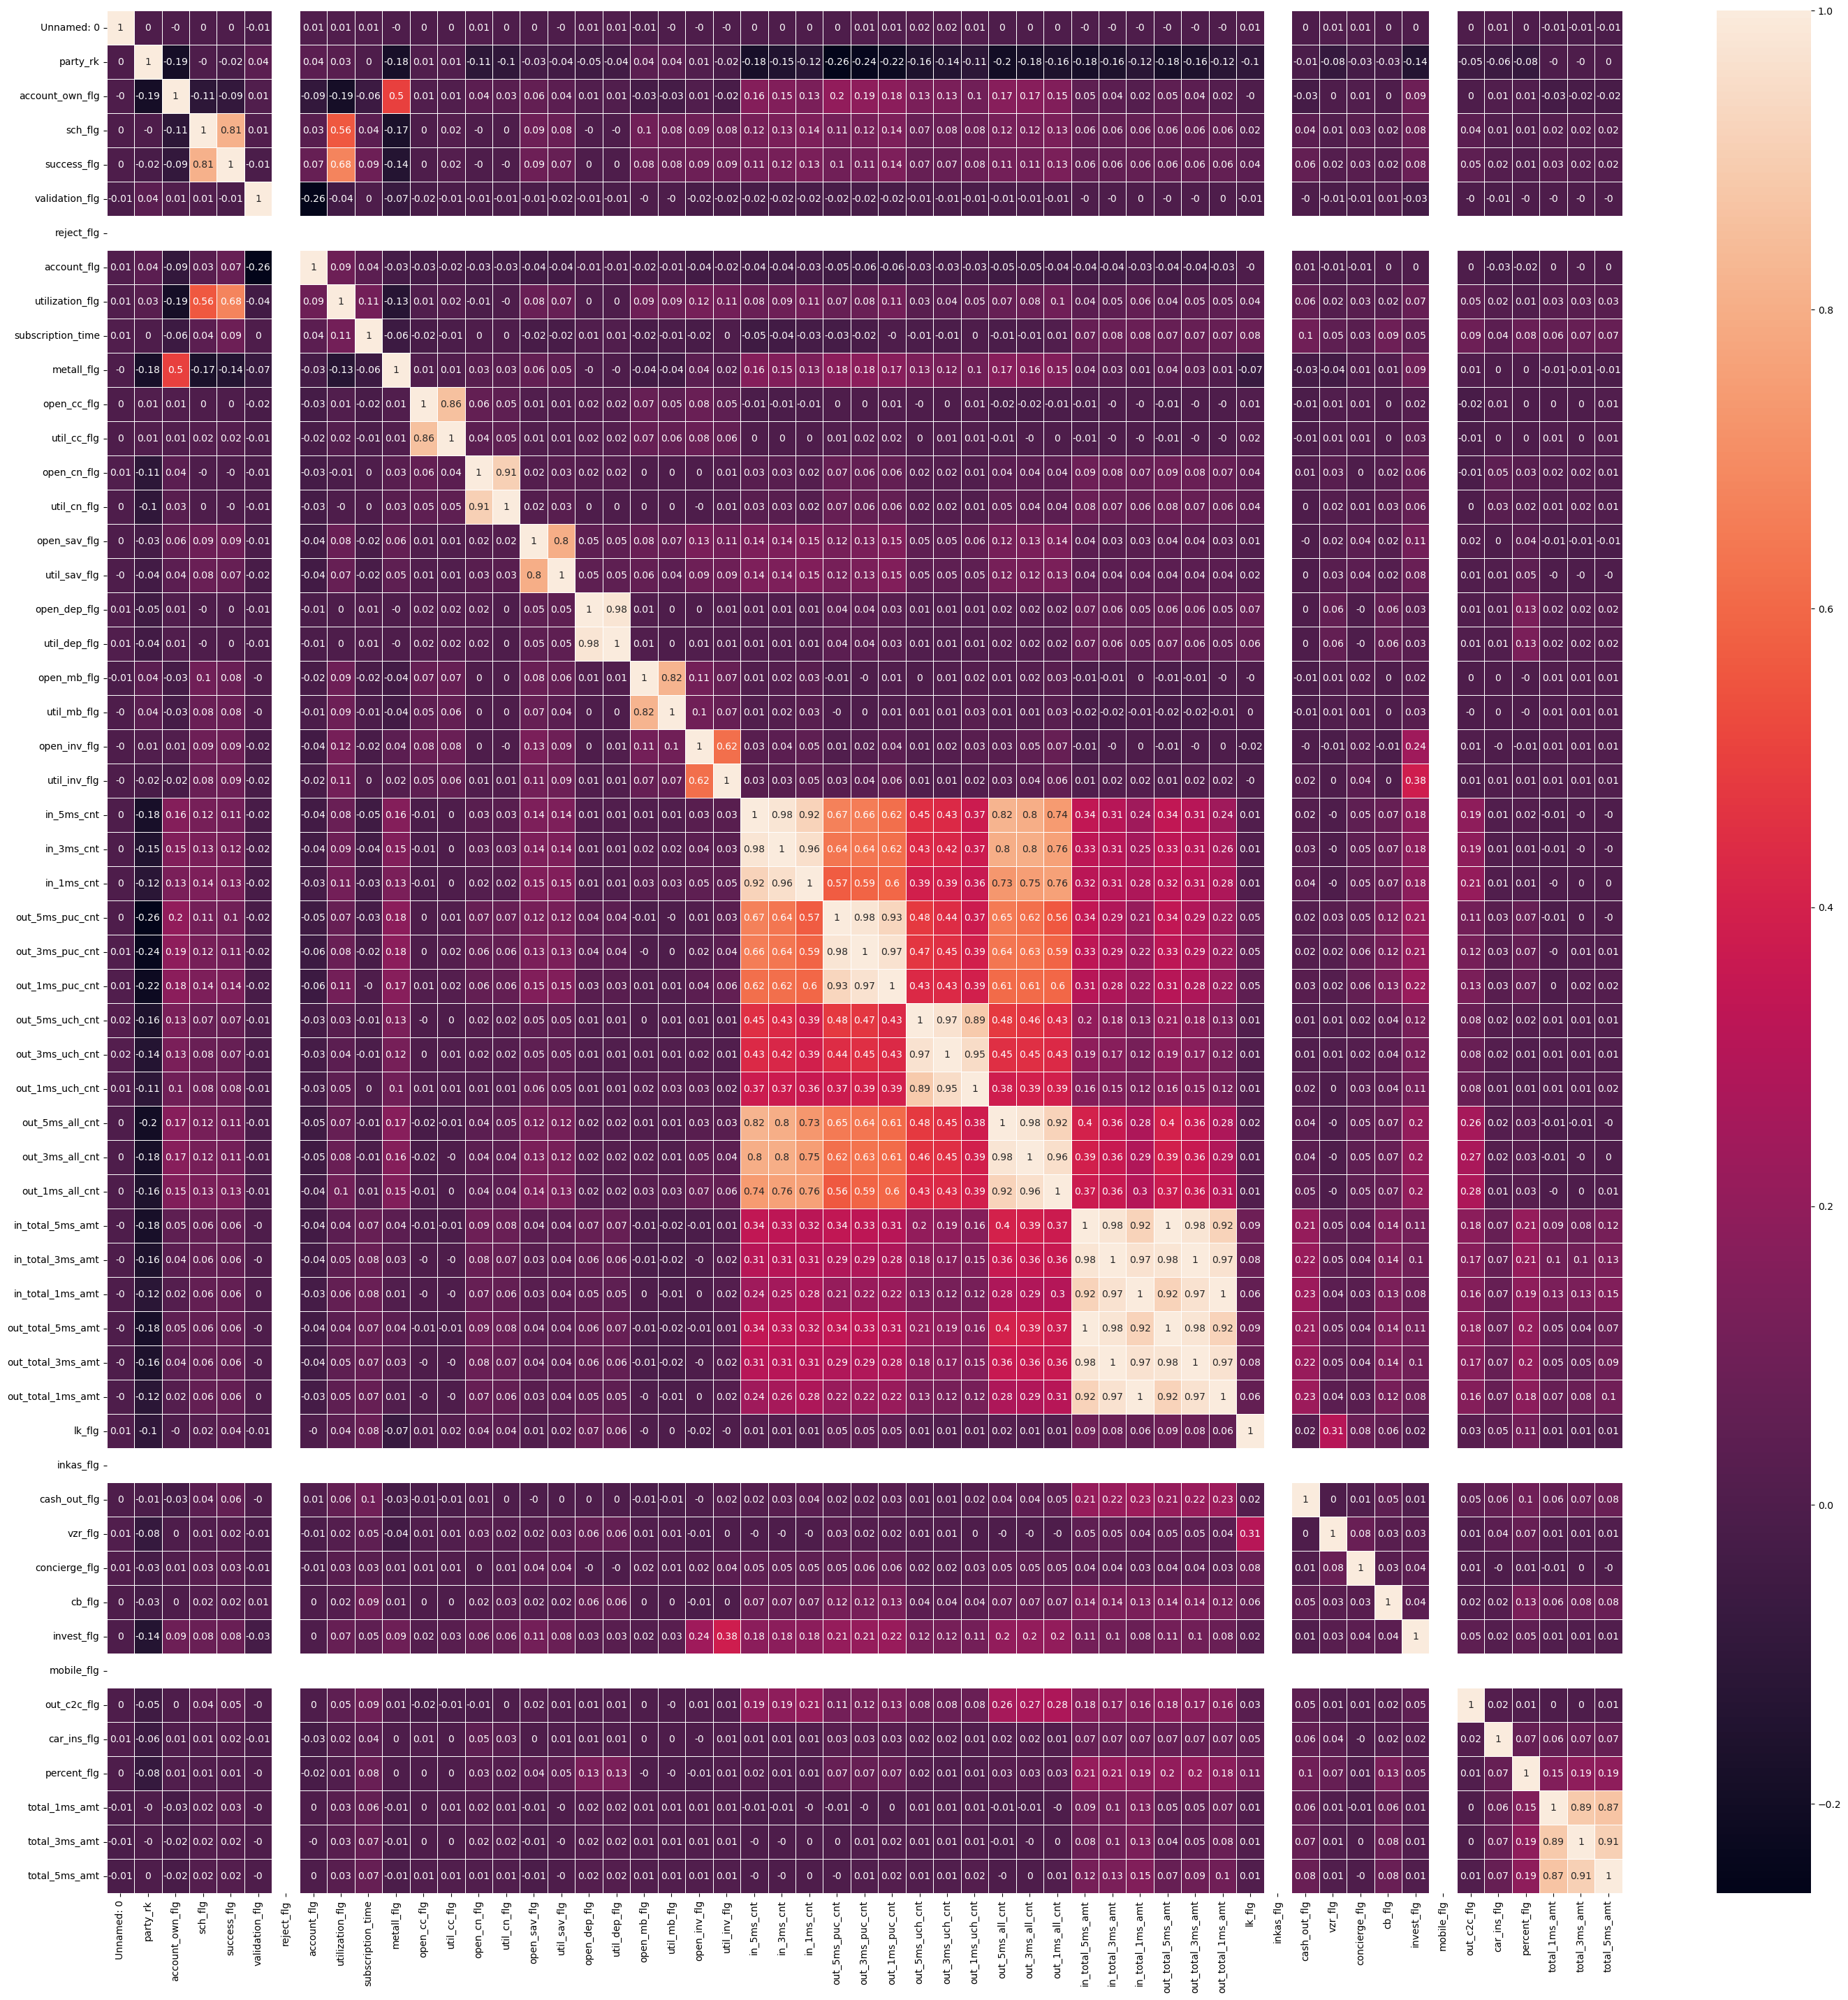

In [26]:
fig, ax = plt.subplots(figsize=(35, 35))  # Sample figsize in inches
sns.heatmap(
    dfpl.with_columns(
    (pl.col("in_total_1ms_amt") - pl.col("out_total_1ms_amt")).alias("total_1ms_amt"),
    (pl.col("in_total_3ms_amt") - pl.col("out_total_3ms_amt")).alias("total_3ms_amt"),
    (pl.col("in_total_5ms_amt") - pl.col("out_total_5ms_amt")).alias("total_5ms_amt"),
).to_pandas().corr(numeric_only=True).round(2),
    annot=True,
    linewidths=0.5,
    fmt="g",
)